In [4]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file

Saving Lotofácil_results.xlsx to Lotofácil_results.xlsx


<ipython-input-12-460de020ef17>:13: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data Sorteio'] = pd.to_datetime(df['Data Sorteio'])


Erro médio quadrático: 1010536.22


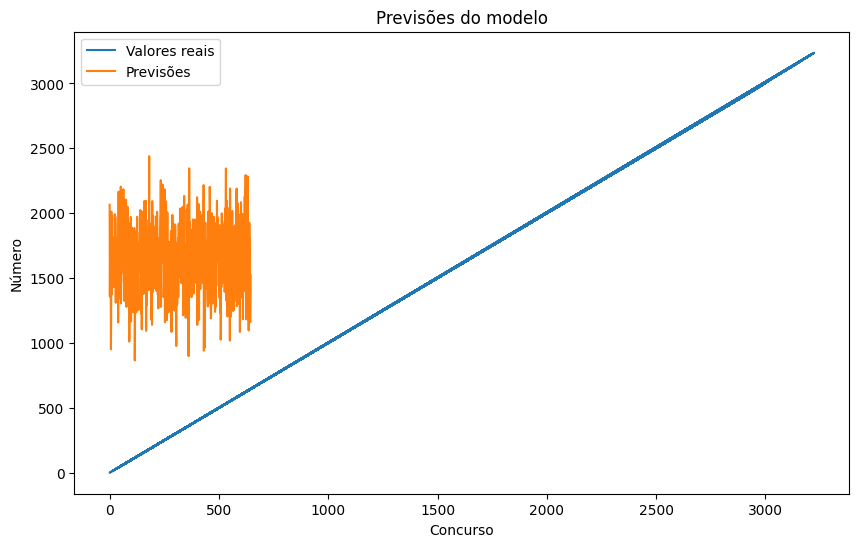

Números previstos para o próximo concurso:
24, 3, 22, 21, 2, 24, 12, 6, 2, 21, 1, 12, 22, 12, 17


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Carregar os dados
df = pd.read_excel('Lotofácil_results.xlsx')

# Converter datas para formato numérico
df['Data Sorteio'] = pd.to_datetime(df['Data Sorteio'])
df['Data Sorteio'] = df['Data Sorteio'].apply(lambda x: x.timestamp())

# Remover dados faltantes
df.dropna(inplace=True)

# Selecionar colunas numéricas
colunas_numericas = ['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6', 'Bola7', 'Bola8', 'Bola9', 'Bola10', 'Bola11', 'Bola12', 'Bola13', 'Bola14', 'Bola15']

# Dividir dados em treinamento e teste
X = df[colunas_numericas]
y = df['Concurso']
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
modelo = RandomForestRegressor()
modelo.fit(X_treinamento, y_treinamento)

# Fazer previsões
previsoes = modelo.predict(X_teste)

# Avaliar modelo
mse = mean_squared_error(y_teste, previsoes)
print(f"Erro médio quadrático: {mse:.2f}")

# Plotar previsões
plt.figure(figsize=(10, 6))
plt.plot(y_teste, label='Valores reais')
plt.plot(previsoes, label='Previsões')
plt.xlabel('Concurso')
plt.ylabel('Número')
plt.title('Previsões do modelo')
plt.legend()
plt.show()

# Fazer previsões para o próximo concurso
np.random.seed(42)
previsao_proximo_concurso = np.random.randint(1, 25, size=(1, 15))
previsao_proximo_concurso = modelo.predict(previsao_proximo_concurso)

# Selecionar os 15 primeiros valores da lista de previsões
numeros_previstos = np.random.randint(1, 25, size=15)

print("Números previstos para o próximo concurso:")
print(", ".join(map(str, numeros_previstos)))
